# Check SED catalog

- Phoenix
- Pickle

In [27]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from astropy.io import fits

%matplotlib inline
from IPython.display import Image, display
from PIL import Image
from scipy.interpolate import interp1d

In [28]:
# to enlarge the sizes
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 6),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

In [29]:
index_num=0
index_val=1
index_temp=2
index_logg=3
index_logz=4
index_spec=5

In [30]:
#input_fits='sedgrid_phoenixmodels_good.fits'
#input_fits='sedgrid_pickle_uvi_selected.fits'
input_fits='sedgrid_pickle_uvk_selected.fits'



In [31]:
hdul = fits.open(input_fits)

In [32]:
hdul.info()


Filename: sedgrid_pickle_uvk_selected.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      14   (8005, 1001)   float64   


In [33]:
hdul[0].header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 8005                                                  
NAXIS2  =                 1001                                                  
NBSED   =                  131                                                  
NBWLBIN =                 8000                                                  
WLMIN   =               3000.0                                                  
WLMAX   =              11000.0                                                  
WLBINWDT=                  1.0                                                  
SEDMODEL= 'pickle_uvk'                                                          
IDX_SPEC=                    5                                                  
IDX_MAG =                 80

In [34]:
 data = hdul[0].data

# Show all spectra

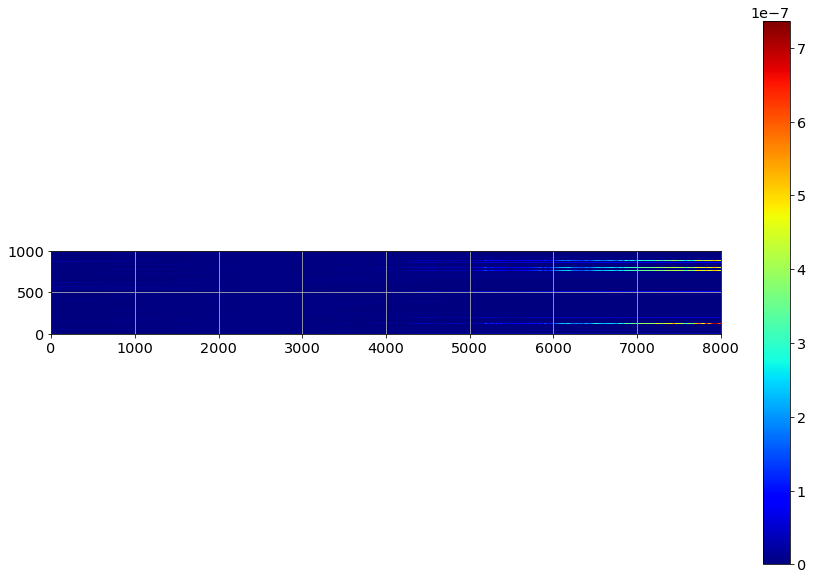

In [35]:
plt.figure(figsize=(15,10))    
img=plt.imshow(data[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

# Show wavelength range

Text(0.5,0,'Wavelength index')

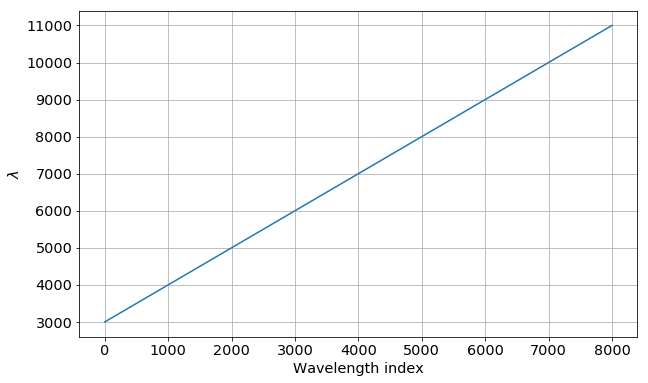

In [36]:
plt.plot(data[0,index_spec:])
plt.grid()
plt.ylabel("$\lambda$")
plt.xlabel("Wavelength index")

# Show good and bad indexes 

## Good indexes

In [37]:
good_indexes=np.where(data[0:,index_val]>0)[0]

In [38]:
good_indexes

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   51,   52,   53,   54,   55,
         56,   57,   58,   59,   60,   61,   62,   63,   64,   65,   66,
         67,   68,   69,   70,   71,   72,   73,   74,   75,   76,   77,
         78,   79,   80,   81,   82,   83,   84,   85,   86,   87,   88,
         89,   90,   91,   92,   93,   94,   95,   96,   97,   98,   99,
        100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
        111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
        133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
        144,  145,  146,  147,  148,  149,  150,  1

Text(0.5,0,'temperature')

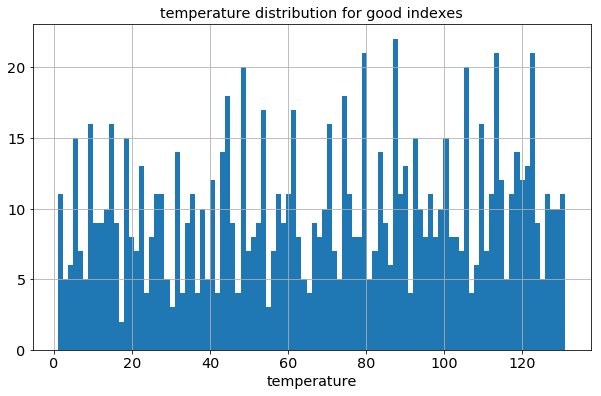

In [39]:
plt.hist(data[good_indexes,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for good indexes')
plt.xlabel('temperature')

Text(0.5,0,'log(G)')

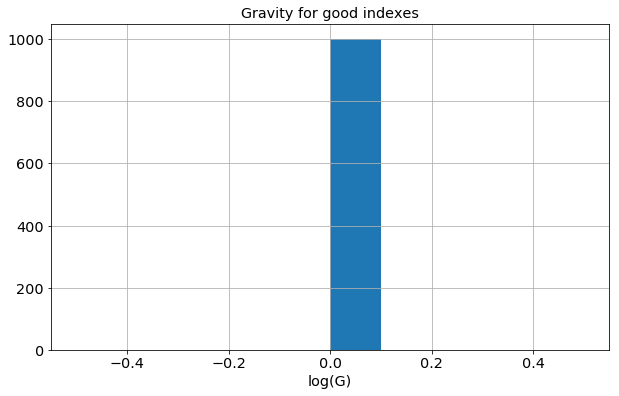

In [40]:
plt.hist(data[good_indexes,index_logg],bins=10);
plt.grid()
plt.title('Gravity for good indexes')
plt.xlabel('log(G)')

Text(0.5,0,'log(Z)')

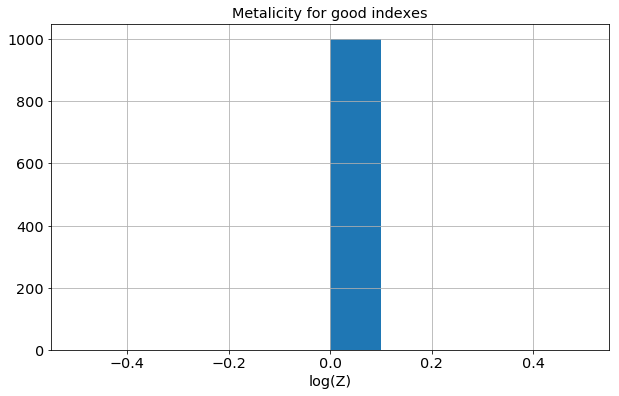

In [41]:
plt.hist(data[good_indexes,index_logg],bins=10);
plt.grid()
plt.title('Metalicity for good indexes')
plt.xlabel('log(Z)')

## Bad indexes

In [42]:
bad_indexes=np.where(data[0:,index_val]<=0)[0]

Text(0.5,0,'temperature')

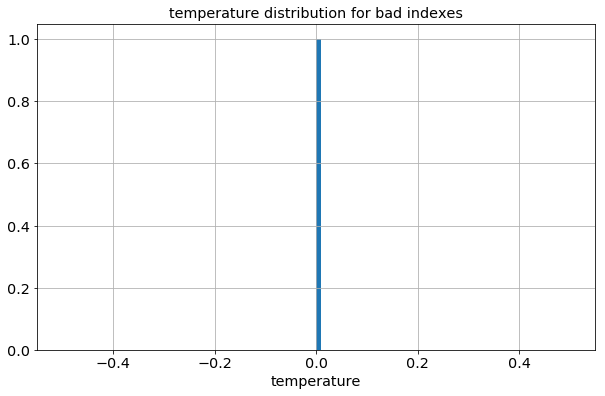

In [43]:
plt.hist(data[bad_indexes,index_temp],bins=100);
plt.grid()
plt.title('temperature distribution for bad indexes')
plt.xlabel('temperature')

Text(0.5,0,'log(G)')

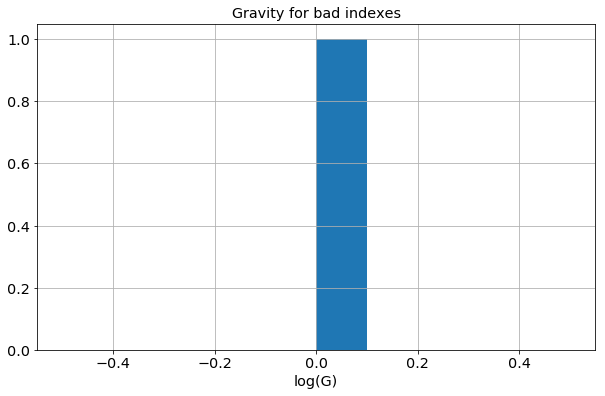

In [44]:
plt.hist(data[bad_indexes,index_logg],bins=10);
plt.grid()
plt.title('Gravity for bad indexes')
plt.xlabel('log(G)')

Text(0.5,0,'log(Z)')

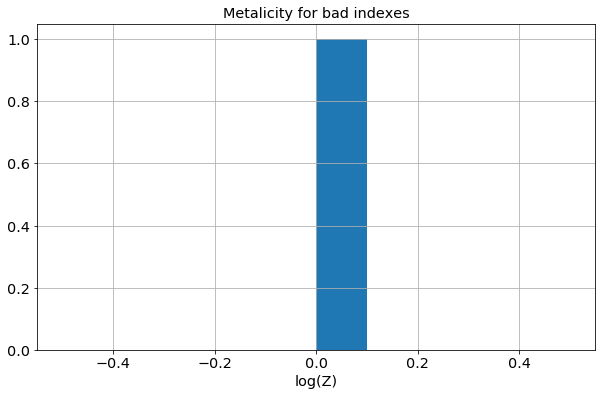

In [45]:
plt.hist(data[bad_indexes,index_logg],bins=10);
plt.grid()
plt.title('Metalicity for bad indexes')
plt.xlabel('log(Z)')

# Select good indexes

In [46]:
good_image=data[good_indexes,:]

In [47]:
good_image.shape

(1000, 8005)

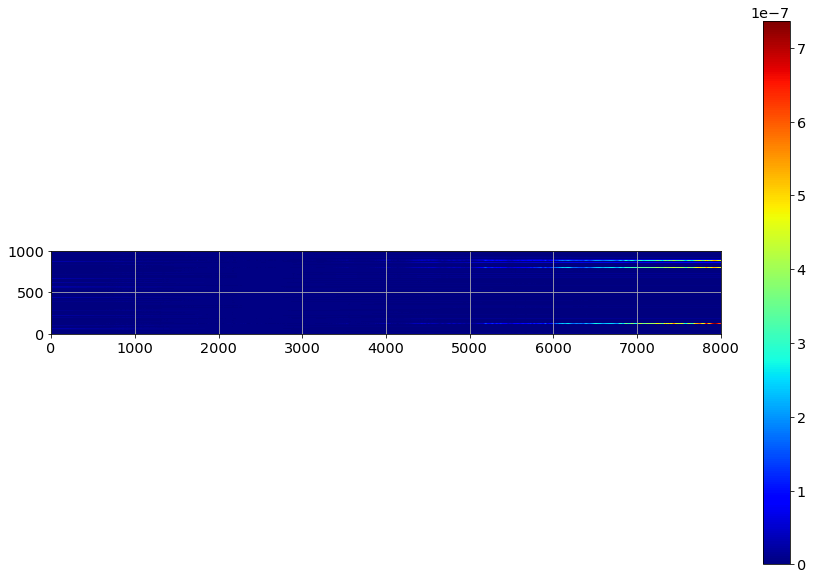

In [48]:
plt.figure(figsize=(15,10))   
img=plt.imshow(good_image[1:,index_spec:],origin='lower',cmap='jet')
plt.colorbar(img)
plt.grid(True)
plt.show()

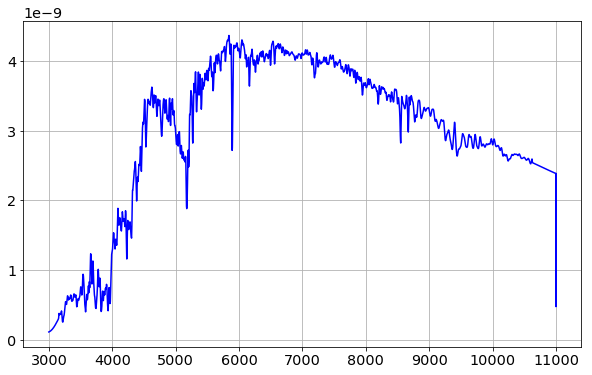

In [49]:
plt.plot(data[0,index_spec:],good_image[100,index_spec:],'b-')
plt.grid()

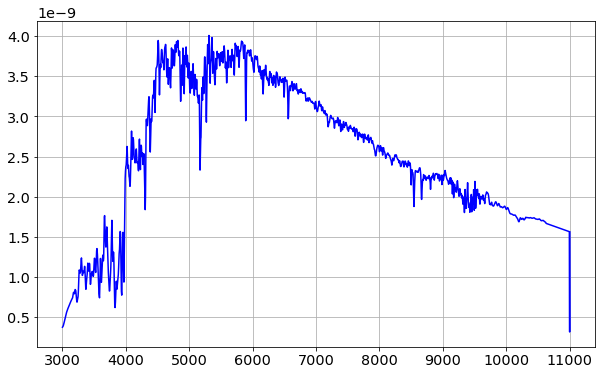

In [50]:
plt.plot(data[0,index_spec:],good_image[0,index_spec:],'b-')
plt.grid()

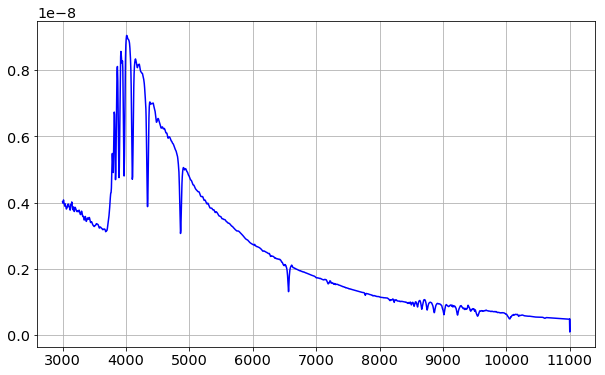

In [51]:
plt.plot(data[0,index_spec:],good_image[50,index_spec:],'b-')
plt.grid()